In [ ]:
Assignment Data Visualization Hacktiv8
Disini kita akan menggunakan dataset dari Kaggle mengenai tingkat kriminalitas yang ada di London untuk membuat visualisasi data dari dataset
tersebut menggunakan Python. Dengan menggunakan data ini, kita bisa melakukan beberapa analisis. contohnya berapa banyak tingkat kriminal di London tiap tahunnya, category kriminal
apa yang paling tinggi, daerah mana yang paling tinggi tingkat kriminalitasnya, dan masih banyak lagi.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
mpl.style.use('ggplot')

In [343]:
!pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

In [2]:
!pip install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [3]:
df = pd.read_csv("london_crime_by_lsoa.csv")
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [ ]:
langkah diatas dilakukan untuk mengambil data dari file csv dan menampilkan data tersebut

In [27]:
#df=df.drop([15169])
#df

In [4]:
df = df[df.value != 0]
df

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...,...
13490581,E01000789,Bromley,Violence Against the Person,Harassment,3,2009,12
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490592,E01033327,Lewisham,Violence Against the Person,Common Assault,2,2013,7


In [ ]:
langkah diatas dilakukan untuk menyingkirkan row yang mengandung value = 0 untuk memudahkan kita menganalisis data dan menghasilkan data yang lebih akurat

In [5]:
for col in df.columns:
    print(col)

lsoa_code
borough
major_category
minor_category
value
year
month


In [ ]:
langkah ini dilakukan untuk mencari tahu ada column apa saja didalam file csv tersebut

In [25]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [ ]:
menampilkan column yang mengandung null values atau missing values jia ada.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3419099 entries, 9 to 13490600
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 208.7+ MB


In [ ]:
mencari tahu tipe data dari tiap column

In [9]:
numOfCrimeinYear = df['year'].value_counts()
numOfCrimeinYear

2016    392042
2008    391242
2009    383008
2015    381859
2010    379349
2011    378814
2012    377721
2014    370384
2013    364680
Name: year, dtype: int64

In [ ]:
mencari tahu berapa kali value dari 'year' muncul didalam column year

In [10]:
describeYear = numOfCrimeinYear.describe()
describeYear

count         9.000000
mean     379899.888889
std        8789.199102
min      364680.000000
25%      377721.000000
50%      379349.000000
75%      383008.000000
max      392042.000000
Name: year, dtype: float64

In [ ]:
menghitung basik statistic dari variabel numOfCrimeinYear

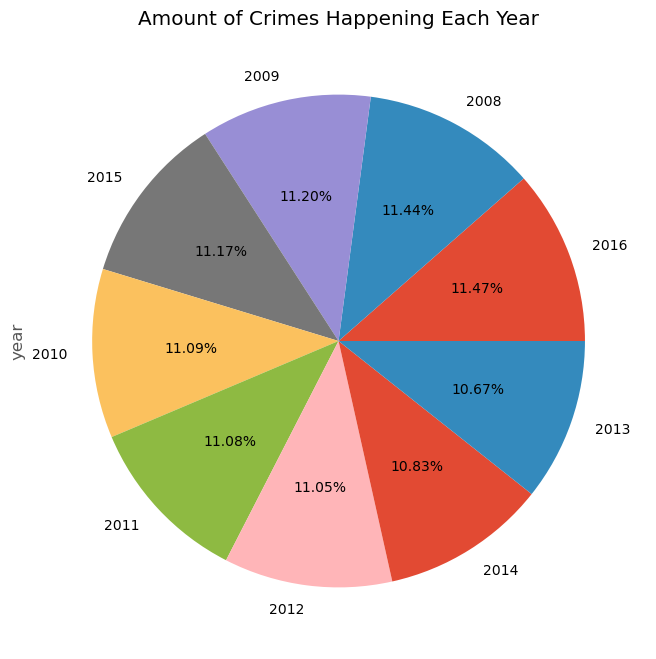

In [11]:
fig,ax1 = plt.subplots(figsize=(8,8))
numOfCrimeinYear.plot(kind='pie',autopct='%.2f%%', #&d%%
                                           title= 'Amount of Crimes Happening Each Year' ,ax=ax1)
plt.show()

In [ ]:
Menurut Pie Chart diatas dan describeYear, bisa dilihat kalau jumlah kejahatan yang terjadi di setiap tahunnya cukup mirip dengan jumlah terbanyak terdapat
di tahun 2016 dan paling sedikit di tahun 2013.

In [12]:
df2 = df.groupby('borough')['value'].sum()
df2.sort_values(ascending=False)

borough
Westminster               455028
Lambeth                   292178
Southwark                 278809
Camden                    275147
Newham                    262024
Croydon                   260294
Ealing                    251562
Islington                 230286
Tower Hamlets             228613
Brent                     227551
Hackney                   217119
Lewisham                  215137
Haringey                  213272
Barnet                    212191
Hillingdon                209680
Wandsworth                204741
Waltham Forest            203879
Enfield                   193880
Hounslow                  186772
Hammersmith and Fulham    185259
Bromley                   184349
Redbridge                 183562
Greenwich                 181568
Kensington and Chelsea    171981
Barking and Dagenham      149447
Havering                  138947
Harrow                    116848
Merton                    115654
Bexley                    114136
Sutton                    100987
Ri

<Axes: title={'center': 'Amount of crimes happened in each Borough'}, xlabel='borough'>

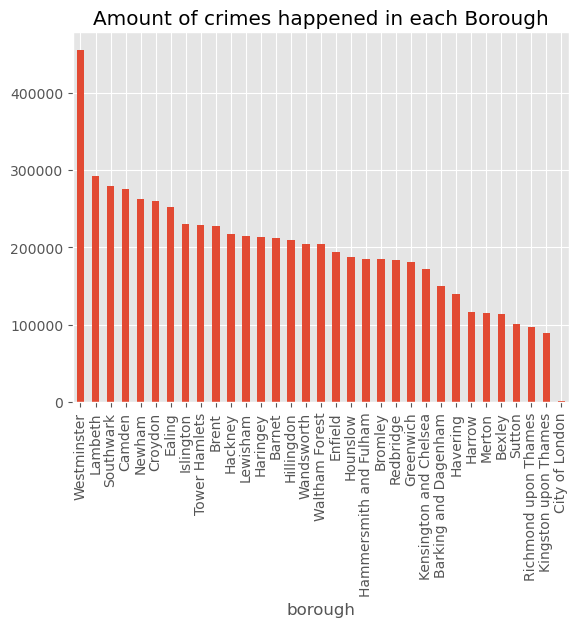

In [13]:
df2 = df.groupby('borough')['value'].sum()
df2.sort_values(ascending=False).plot(kind = 'bar', title = 'Amount of crimes happened in each Borough')

In [ ]:
Dari bar plot diatas, kita bisa melihat daerah di London yang paling berbahaya (berdasarkan sum dari value dari tiap borough).
Dari hasilnya, Westminster merupakan daerah yang memiliki tingkat/kasus kriminalitas paling tinggi dan City of London merupakan daerah 
yang cenderung paling aman.

In [14]:
df3 = df.groupby('major_category')['value'].sum()
#df3.sort_values(ascending=False).plot(kind = 'hist')
#ax = df['major_category'].plot.area()
df3

major_category
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Fraud or Forgery                  5325
Other Notifiable Offences       106349
Robbery                         258873
Sexual Offences                   1273
Theft and Handling             2661861
Violence Against the Person    1558081
Name: value, dtype: int64

In [15]:
listLabel=list(df3.index)
listLabel

['Burglary',
 'Criminal Damage',
 'Drugs',
 'Fraud or Forgery',
 'Other Notifiable Offences',
 'Robbery',
 'Sexual Offences',
 'Theft and Handling',
 'Violence Against the Person']

In [16]:
forArea = df.groupby(['year','major_category'])['value'].sum().reset_index(name='count')
#forArea.unstack(level=1)
forArea = forArea.pivot_table(values='count', index=['year'], columns='major_category')
forArea

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092.0,91872.0,68804.0,5325.0,10112.0,29627.0,1273.0,283692.0,159844.0
2009,90619.0,85565.0,60549.0,NaN,10644.0,29568.0,NaN,279492.0,160777.0
2010,86826.0,77897.0,58674.0,NaN,10768.0,32341.0,NaN,290924.0,157894.0
2011,93315.0,70914.0,57550.0,NaN,10264.0,36679.0,NaN,309292.0,146901.0
2012,93392.0,62158.0,51776.0,NaN,10675.0,35260.0,NaN,334054.0,150014.0
2013,87222.0,56206.0,50278.0,NaN,10811.0,29337.0,NaN,306372.0,146181.0
2014,76053.0,59279.0,44435.0,NaN,13037.0,22150.0,NaN,279880.0,185349.0
2015,70489.0,62976.0,39785.0,NaN,14229.0,21383.0,NaN,284022.0,218740.0
2016,68285.0,64071.0,38914.0,NaN,15809.0,22528.0,NaN,294133.0,232381.0


In [ ]:
Mencari tahu jumlah tindak kriminalitas dari tiap category dan berdasarkan tahunnya

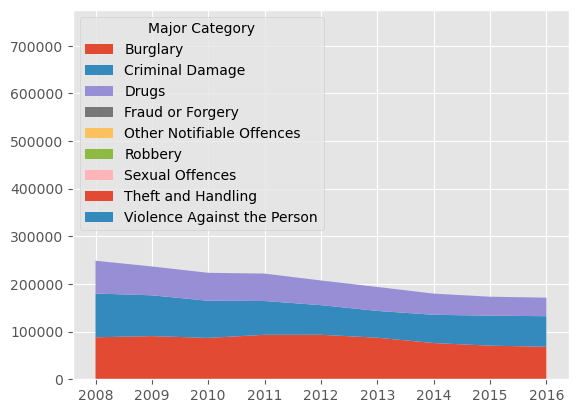

In [20]:
plt.stackplot(forArea.index,forArea.values.T,labels=forArea.columns)
plt.legend(loc='upper left', title='Major Category')
plt.show()

In [ ]:
Area plot yang menunjukkan tingkat kriminalitas berdasarkan major category dengan periode 2008-2016

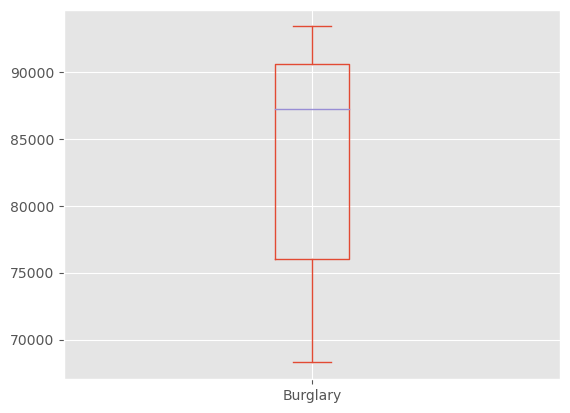

In [21]:
forArea['Burglary'].plot(kind='box');

In [ ]:
box plot yang menunjukkan dataset dari major category burglary

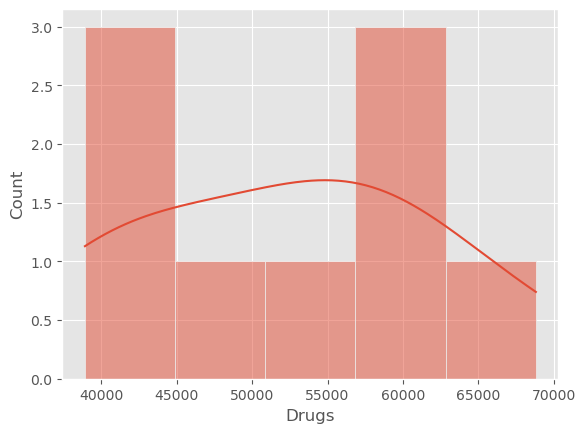

In [22]:
sns.histplot(x=forArea['Drugs'], kde=True);

In [ ]:
Histogram yang menunjukkan data dary major category "Drugs"

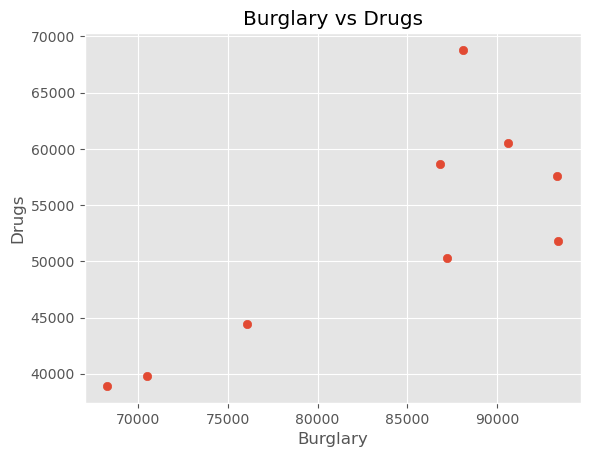

In [23]:
fig, ax = plt.subplots()

ax.set_title('Burglary vs Drugs')
ax.set_xlabel('Burglary')
ax.set_ylabel('Drugs')

ax.scatter(forArea['Burglary'],forArea['Drugs'])
plt.show()

In [ ]:
Scatter plot yang menunjukkan hubungan antara kejahatan jenis burglary dan kejahatan jenis drugs. Dari plot tersebut, kita bisa melihat adanya peningkatan 
yang berarti adanya kejahatan berupa burglary diikuti atau dipengaruhi oleh adanya pengaruh dari drugs (kejahatan berupa drugs)

In [311]:
stopwords = set(STOPWORDS)

In [336]:
df['major_category'].to_csv('data.txt', sep='\t', index=False)

In [340]:
wc = open('data.txt', 'r').read()

print ('File downloaded and saved!')

File downloaded and saved!


In [ ]:
wc = open('data.txt', 'r').read()

print ('File downloaded and saved!')

In [ ]:
# instantiate a word cloud object
wcc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
wcc.generate(wc)

In [ ]:
# display the word cloud
plt.imshow(wcc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
# define the world map centered around Semarang with a low zoom level
world_map = folium.Map(location=[51.507359, -0.136439], zoom_start=11, tiles='Stamen Terrain')

# display world map
world_map